In [28]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# 2. Import required libraries and set file path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = '/content/drive/My Drive/Lachesis/'


In [13]:
# 3a. Load Power Query cleaned Excel files
pq_files = {
    '2018–19': '2018-19 Power Query.xlsx',
    '2019–20': '2019-20 Power Query.xlsx',
    '2020–21': '2020-21 Power Query.xlsx',
    '2021–22': '2021-22 Power Query.xlsx',
    '2022–23': '2022-23 Power Query.xlsx'
}

pq_dfs = []
for year, file in pq_files.items():
    df = pd.read_excel(os.path.join(folder_path, file), sheet_name=0)
    df['Submission Year'] = year
    pq_dfs.append(df)

pq_data = pd.concat(pq_dfs, ignore_index=True)
pq_data = pq_data.dropna(subset=['Year'])  # Drop rows without a year value
print(pq_data.columns.tolist())




['Year', 'Current Price ($ million)', 'Constant Priice ($ million)', 'Nominal Growth (%)', 'Real Growth (%)', 'Submission Year', 'Column1', 'Government', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Non-government', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14']


In [31]:
# 3b. Load Combined A6 Table file (all years in one Excel)
a6_file = 'Combined A6 tables 2018-2023.xlsx'
a6_data = pd.read_excel(os.path.join(folder_path, a6_file), sheet_name=0)

print(a6_data.columns.tolist())
a6_data.head()


['Column1', 'Government', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Non-government', 'Column10', 'Column11', 'Column12', 'Column14']


,Column1,Government,Column3,Column4,Column5,Column6,Column7,Non-government,Column10,Column11,Column12,Column14
0,Area of expenditure,DVA,Health and other,Premium rebates,Total,State and local,Total,HIF,Individuals,Other,Total,Total health expenditure
1,Hospitals,1321,23702,3332,28354,33280,61634,9689,3689,4036,17415,79049
2,Public hospital services,579,23582,342,24504,32229,56732,995,1444,2630,5068,61801
3,Private hospitals,741,120,2989,3851,1051,4902,8694,2246,1407,12347,17248
4,Primary health care,1333,25783,1049,28165,10508,38672,3051,21351,2474,26876,65549


/tmp/ipython-input-1324540770.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


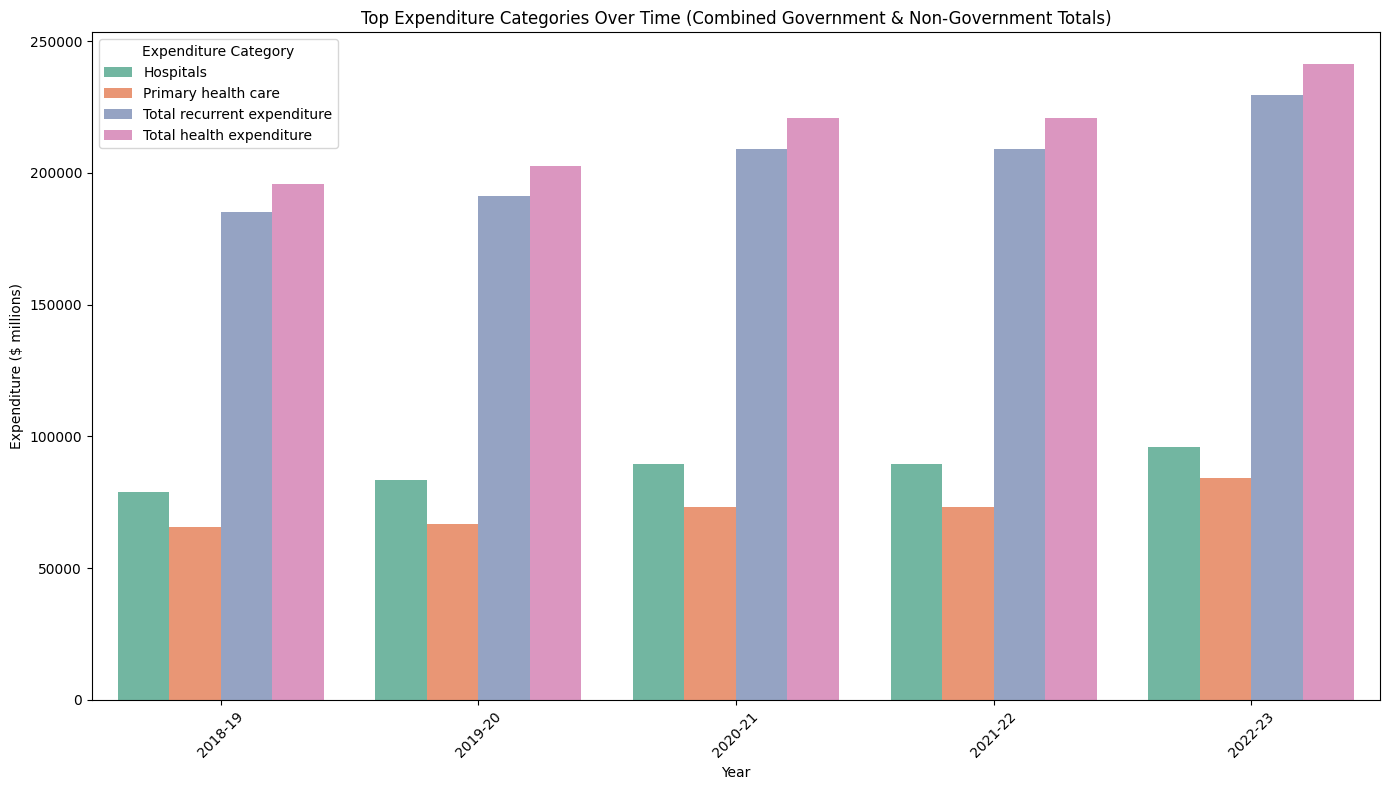

In [16]:

# Load the Excel file
file_path = '/content/drive/My Drive/Lachesis/Combined A6 tables 2018-2023.xlsx'  # Adjust this path as needed if running in Colab
xls = pd.ExcelFile(file_path)

# Read and clean all sheets
all_years = []

for sheet in xls.sheet_names:
    df = xls.parse(sheet)

    # Rename expected columns
    df = df.rename(columns={
        'Column1': 'Expenditure Category',
        'Column14': 'Amount'
    })

    # Filter to keep only relevant columns
    df = df[['Expenditure Category', 'Amount']]
    df = df.dropna(subset=['Expenditure Category', 'Amount'])

    # Keep rows where Amount is numeric only
    df = df[df['Amount'].apply(lambda x: isinstance(x, (int, float)))]

    # Add Year column
    df['Year'] = sheet

    all_years.append(df)

#  Combine all years into one DataFrame
df_combined = pd.concat(all_years, ignore_index=True)

#  Filter for selected top-level categories
top_categories = [
    'Total health expenditure',
    'Total recurrent expenditure',
    'Hospitals',
    'Primary health care'
]

filtered_data = df_combined[df_combined['Expenditure Category'].isin(top_categories)].copy()
filtered_data['Year'] = filtered_data['Year'].astype(str)

#  Plot: Grouped Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_data,
    x='Year',
    y='Amount',
    hue='Expenditure Category',
    palette='Set2',
    dodge=True,
    ci=None
)

plt.title("Top Expenditure Categories Over Time (Combined Government & Non-Government Totals)")
plt.ylabel("Expenditure ($ millions)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Expenditure Category')
plt.tight_layout()
plt.show()


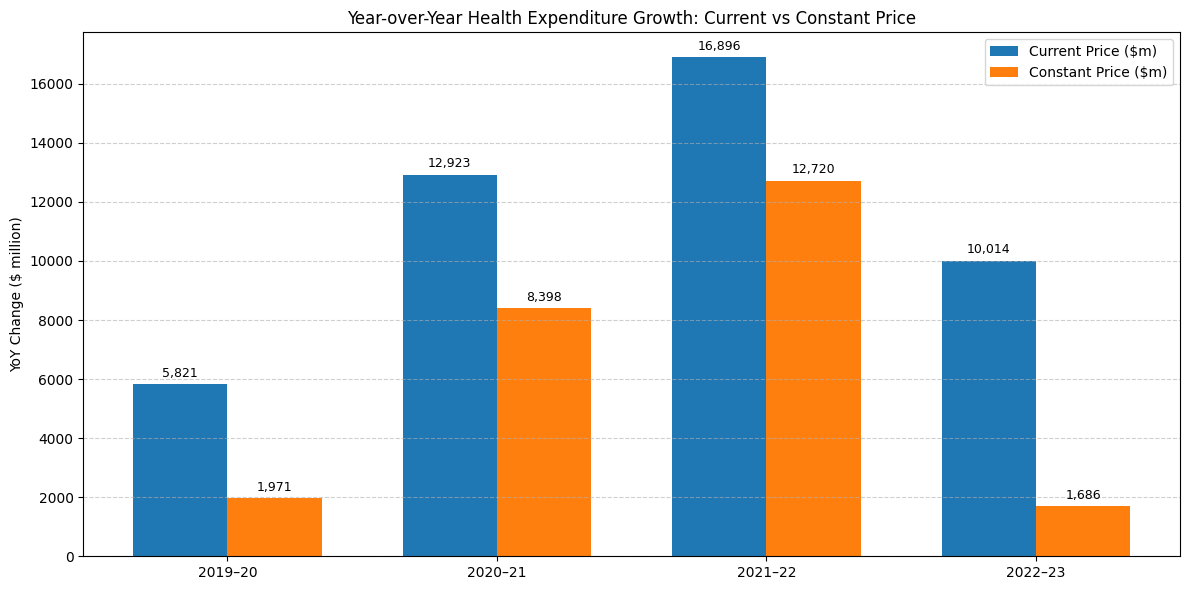

In [17]:
# 5. Year-over-Year Growth: Current vs Constant ($m)


df_combined["Current YoY ($m)"] = df_combined["Current ($m)"].diff()
df_combined["Constant YoY ($m)"] = df_combined["Constant ($m)"].diff()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x = range(1, len(df_combined))  # skip first year (no YoY change)

# Bars
bars1 = ax.bar([i - bar_width/2 for i in x], df_combined["Current YoY ($m)"].iloc[1:],
               width=bar_width, label="Current Price ($m)", color="#1f77b4")
bars2 = ax.bar([i + bar_width/2 for i in x], df_combined["Constant YoY ($m)"].iloc[1:],
               width=bar_width, label="Constant Price ($m)", color="#ff7f0e")

# Annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(df_combined["Year"].iloc[1:])
ax.set_ylabel("YoY Change ($ million)")
ax.set_title("Year-over-Year Health Expenditure Growth: Current vs Constant Price")
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1324540770.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


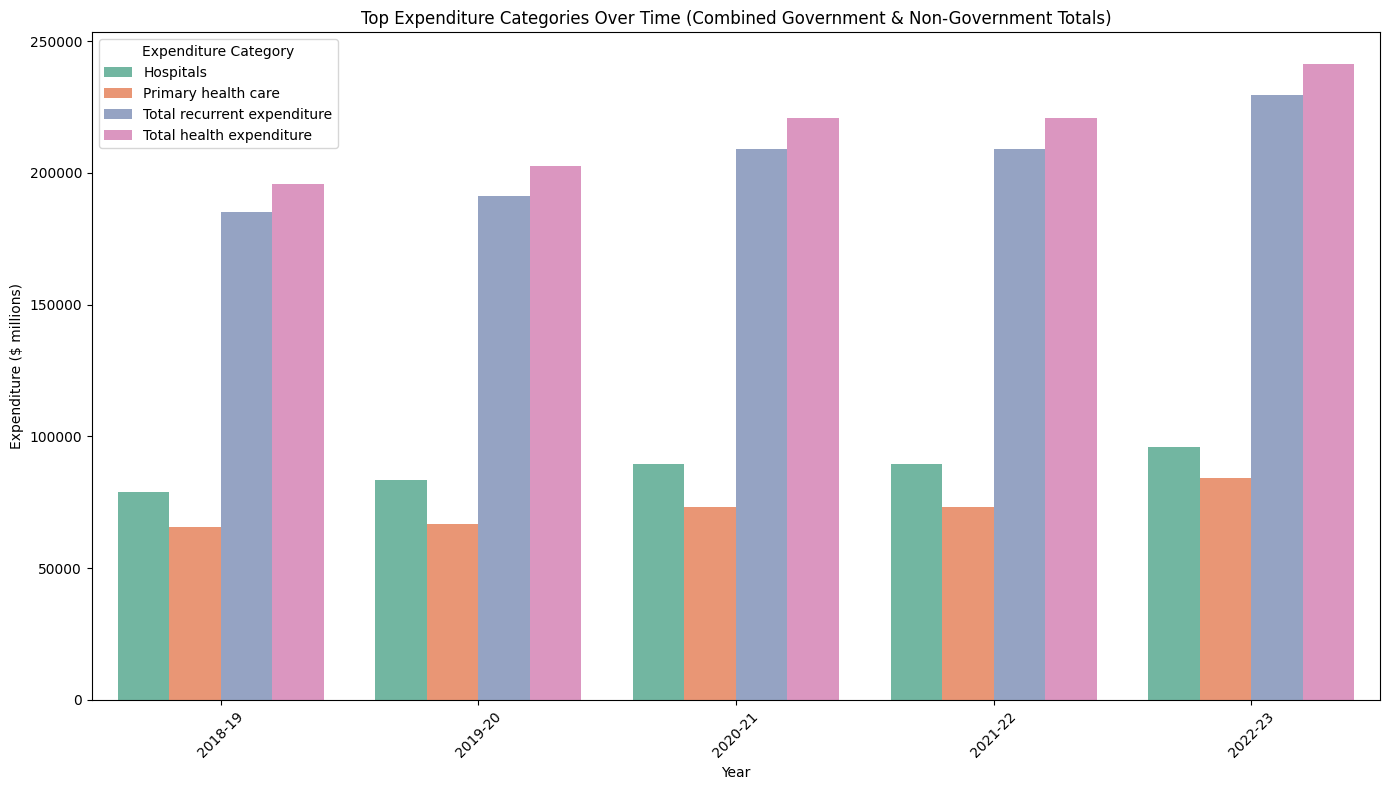

In [ ]:

# Load the Excel file
file_path = '/content/drive/My Drive/Lachesis/Combined A6 tables 2018-2023.xlsx'  # Adjust this path as needed if running in Colab
xls = pd.ExcelFile(file_path)

# Read and clean all sheets
all_years = []

for sheet in xls.sheet_names:
    df = xls.parse(sheet)

    # Rename expected columns
    df = df.rename(columns={
        'Column1': 'Expenditure Category',
        'Column14': 'Amount'
    })

    # Filter to keep only relevant columns
    df = df[['Expenditure Category', 'Amount']]
    df = df.dropna(subset=['Expenditure Category', 'Amount'])

    # Keep rows where Amount is numeric only
    df = df[df['Amount'].apply(lambda x: isinstance(x, (int, float)))]

    # Add Year column
    df['Year'] = sheet

    all_years.append(df)

# Combine all years into one DataFrame
df_combined = pd.concat(all_years, ignore_index=True)

# Filter for selected top-level categories
top_categories = [
    'Total health expenditure',
    'Total recurrent expenditure',
    'Hospitals',
    'Primary health care'
]

filtered_data = df_combined[df_combined['Expenditure Category'].isin(top_categories)].copy()
filtered_data['Year'] = filtered_data['Year'].astype(str)

# Plot: Grouped Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_data,
    x='Year',
    y='Amount',
    hue='Expenditure Category',
    palette='Set2',
    dodge=True,
    ci=None
)

plt.title("Top Expenditure Categories Over Time (Combined Government & Non-Government Totals)")
plt.ylabel("Expenditure ($ millions)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Expenditure Category')
plt.tight_layout()
plt.show()


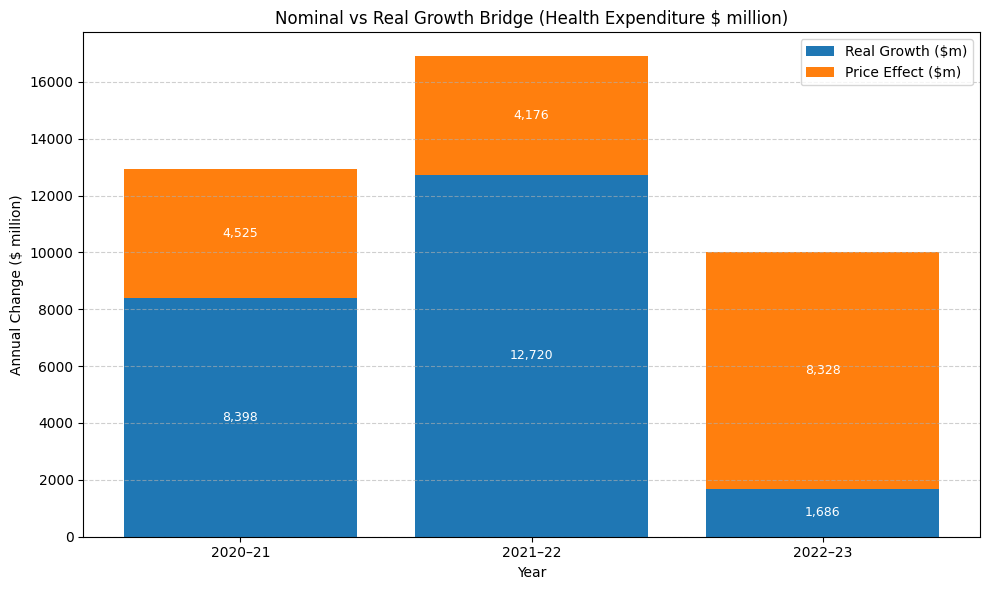

In [18]:
# 6. Nominal vs Real Growth Bridge – Stacked Bar Chart


df_combined['Nominal Growth ($m)'] = df_combined['Current ($m)'].diff()
df_combined['Real Growth ($m)'] = df_combined['Constant ($m)'].diff()
df_combined['Price Effect ($m)'] = df_combined['Nominal Growth ($m)'] - df_combined['Real Growth ($m)']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars: Real + Price Effect
ax.bar(df_combined['Year'], df_combined['Real Growth ($m)'],
       label='Real Growth ($m)', color='#1f77b4')
ax.bar(df_combined['Year'], df_combined['Price Effect ($m)'],
       bottom=df_combined['Real Growth ($m)'], label='Price Effect ($m)', color='#ff7f0e')

# Add annotations
for i in range(1, len(df_combined)):
    real = df_combined['Real Growth ($m)'].iloc[i]
    price = df_combined['Price Effect ($m)'].iloc[i]

    ax.text(i, real / 2, f"{real:,.0f}", ha='center', va='center', color='white', fontsize=9)
    ax.text(i, real + price / 2, f"{price:,.0f}", ha='center', va='center', color='white', fontsize=9)

# Final formatting
ax.set_title("Nominal vs Real Growth Bridge (Health Expenditure $ million)")
ax.set_ylabel("Annual Change ($ million)")
ax.set_xlabel("Year")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


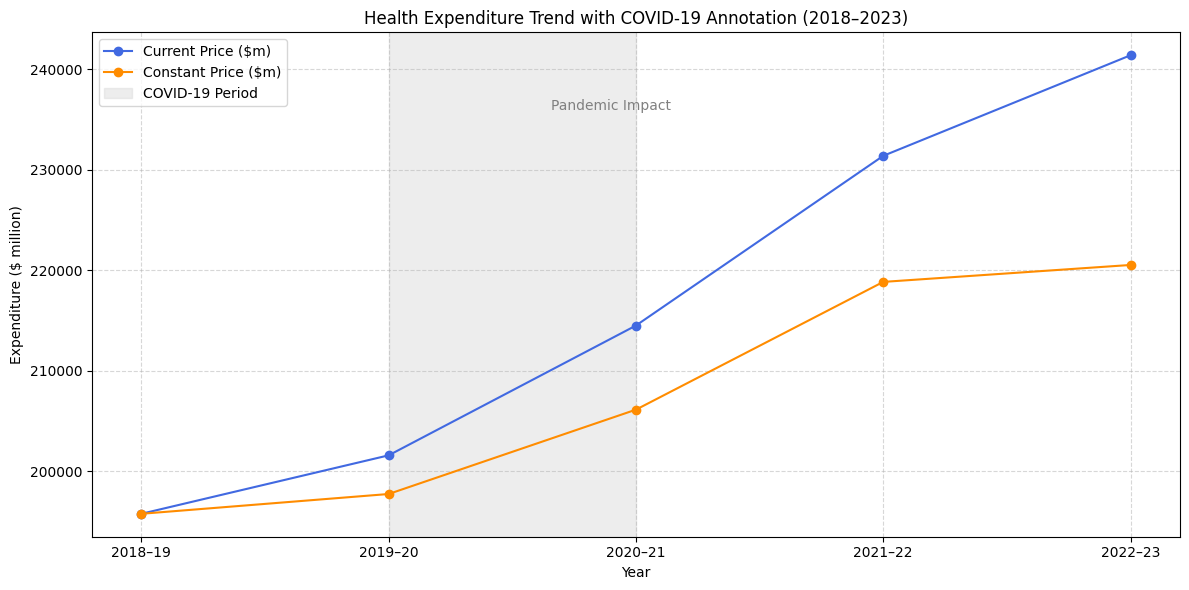

In [19]:
# 7. Line graph with COVID-19 annotation

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(years, current_exp, marker='o', linestyle='-', label='Current Price ($m)', color='royalblue')
plt.plot(years, constant_exp, marker='o', linestyle='-', label='Constant Price ($m)', color='darkorange')

# COVID-19 impact (highlight 2019–20 to 2020–21)
plt.axvspan('2019–20', '2020–21', color='lightgray', alpha=0.4, label='COVID-19 Period')
plt.text(1.9, 236000, 'Pandemic Impact', fontsize=10, color='gray', ha='center')

# Labels and formatting
plt.title('Health Expenditure Trend with COVID-19 Annotation (2018–2023)')
plt.xlabel('Year')
plt.ylabel('Expenditure ($ million)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


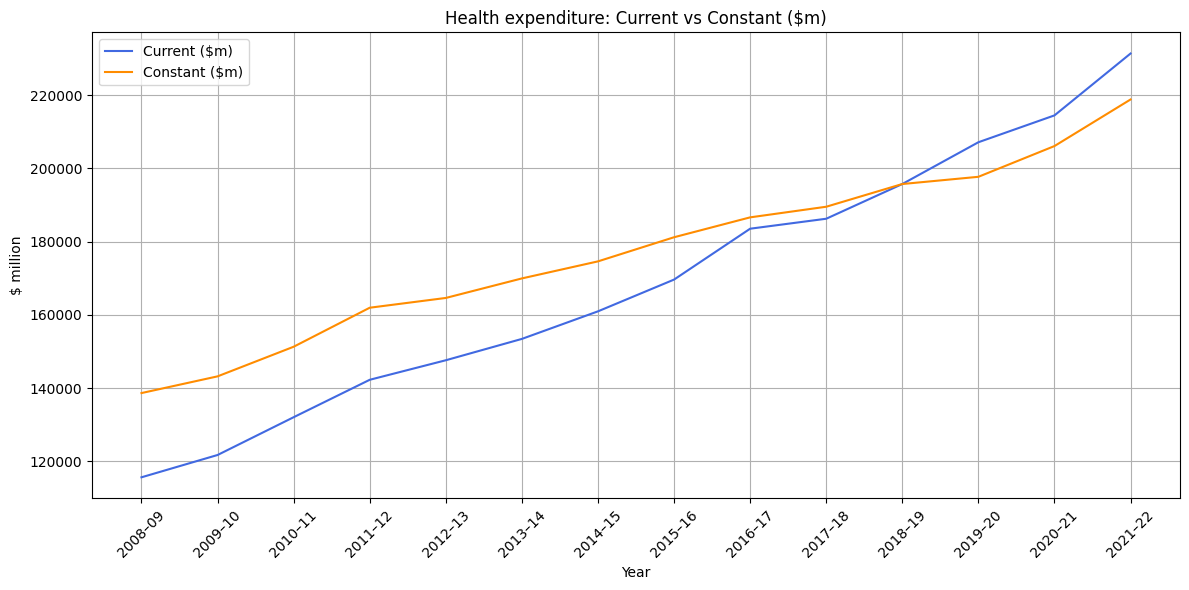

In [23]:

plt.figure(figsize=(12, 6))
plt.plot(years, current_exp, label='Current ($m)', color='royalblue')  # removed marker='o'
plt.plot(years, constant_exp, label='Constant ($m)', color='darkorange')  # removed marker='o'

plt.title("Health expenditure: Current vs Constant ($m)")
plt.xlabel("Year")
plt.ylabel("$ million")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig("current_vs_constant_expenditure_trends_2008_2022_nodots.png")
plt.show()


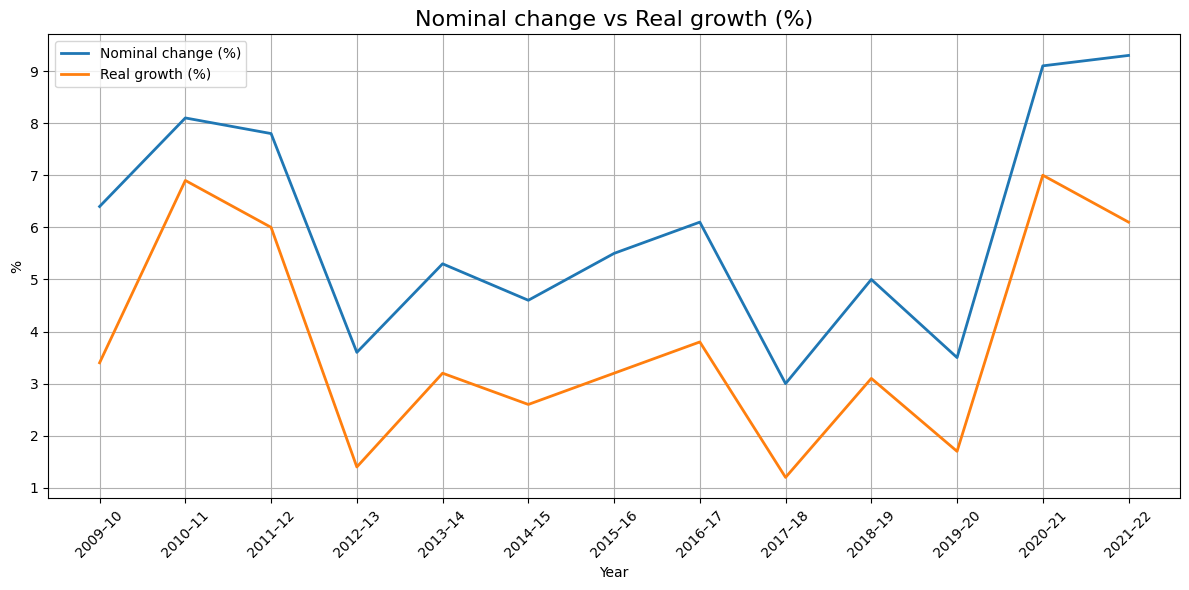

In [37]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines without dots
plt.plot(df["Year"], df["Nominal change (%)"], label="Nominal change (%)", linewidth=2)
plt.plot(df["Year"], df["Real growth (%)"], label="Real growth (%)", linewidth=2)

plt.title("Nominal change vs Real growth (%)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("%")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


/tmp/ipython-input-971732373.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


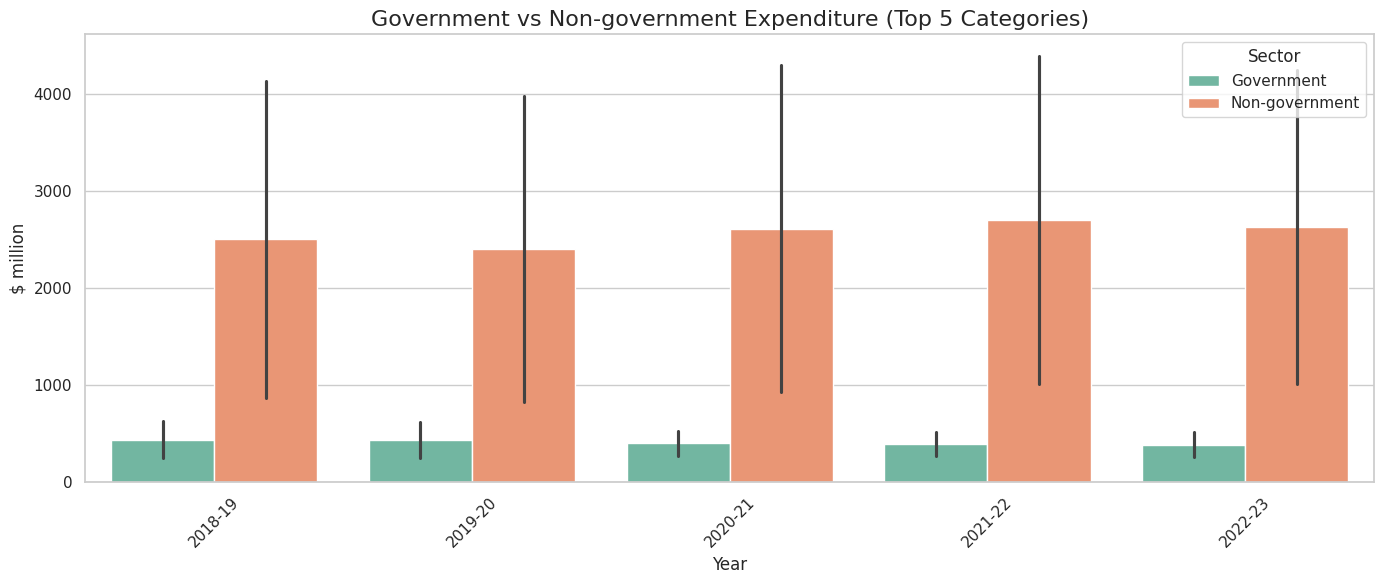

In [44]:

# Select top 5 categories based on total expenditure
top_categories = df.groupby('Category')["Expenditure ($m)"].sum().nlargest(5).index
df_top5 = df[df['Category'].isin(top_categories)]

# Grouped barplot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_top5,
    x='Year',
    y='Expenditure ($m)',
    hue='Sector',
    ci='sd',
    palette='Set2'
)

plt.title('Government vs Non-government Expenditure (Top 5 Categories)', fontsize=16)
plt.ylabel('$ million')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.tight_layout()


plt.show()


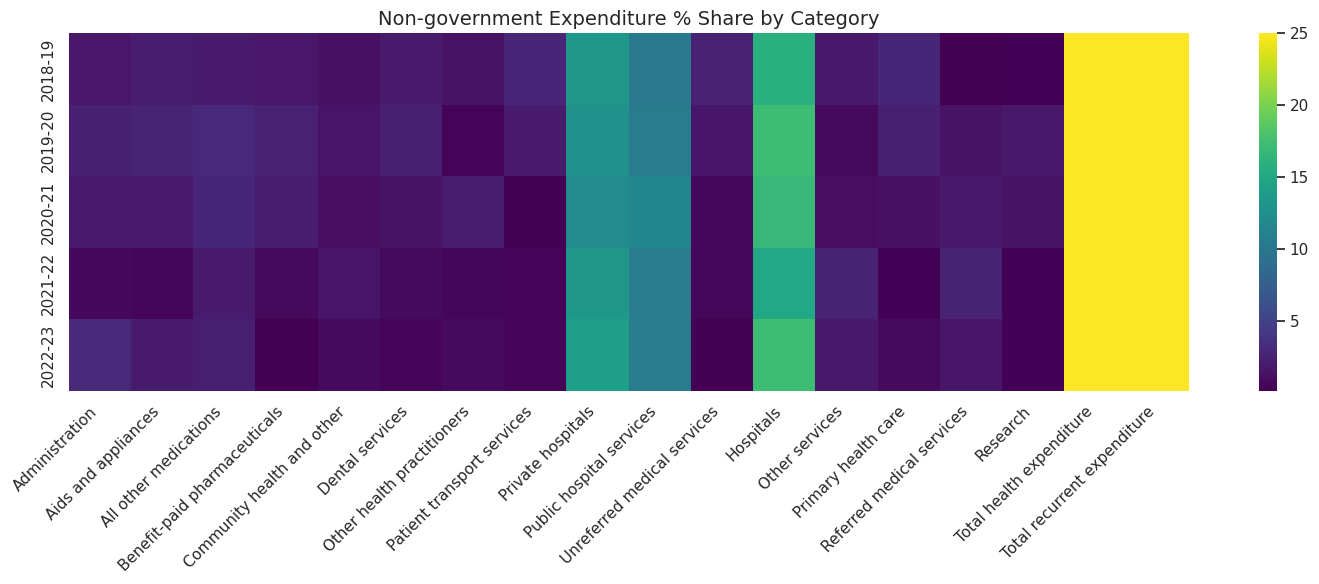

In [46]:

# Plot
plt.figure(figsize=(15, 6))
sns.heatmap(df, cmap="viridis", cbar=True)

plt.title("Non-government Expenditure % Share by Category", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
